In [11]:
# 1. Librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de gráficos
sns.set(style="whitegrid")


In [12]:
# 2. Carga del dataset
df = pd.read_csv("DB3A - Wine quality/wine quality/winequality.csv", sep=";")

# Vista rápida del dataset
df.head()


,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
# 3. Limpieza básica
df["alcohol"] = pd.to_numeric(df["alcohol"], errors="coerce")
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Verificamos que ya no haya nulos ni duplicados
print("Duplicados:", df.duplicated().sum())
print("Nulos por columna:\n", df.isnull().sum())


Duplicados: 0
Nulos por columna:
 Type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [14]:
# 4. Encoding de 'Type'
if "Type" in df.columns:
    le = LabelEncoder()
    df["Type_encoded"] = le.fit_transform(df["Type"])
    df.drop("Type", axis=1, inplace=True)

# Confirmar que no quedan variables categóricas
print("Variables categóricas restantes:", df.select_dtypes(include='object').columns.tolist())


Variables categóricas restantes: []


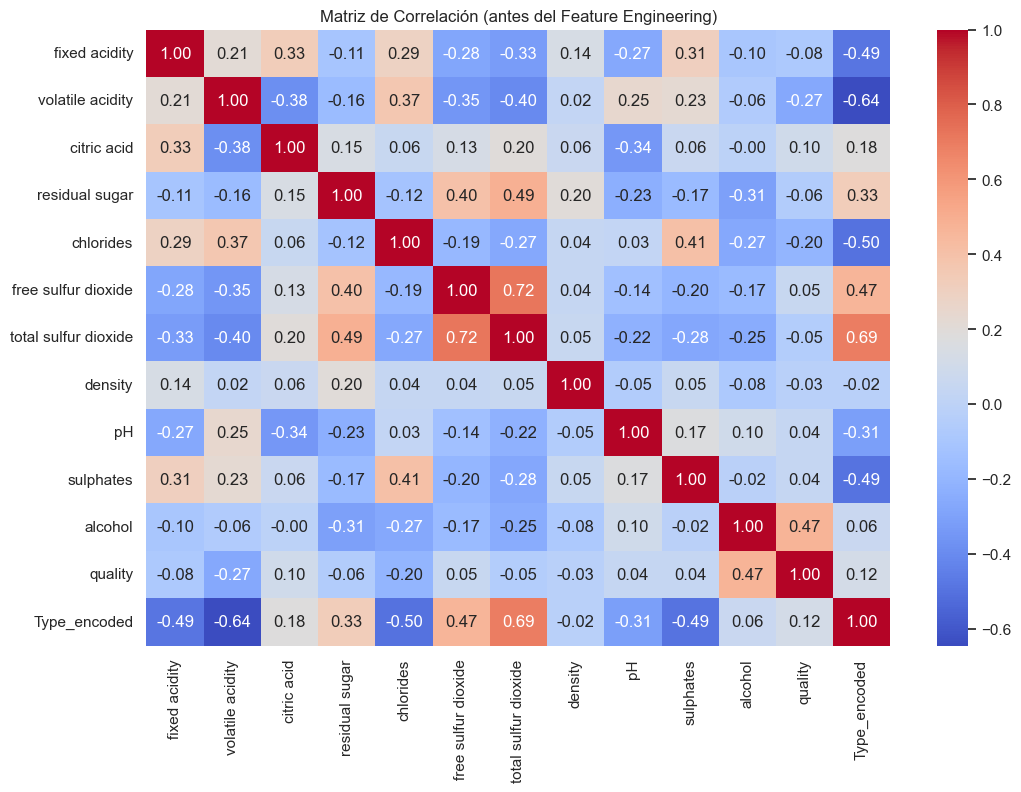

In [15]:
# 🔍 Matriz de correlación antes de crear nuevas variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (antes del Feature Engineering)")
plt.show()


In [16]:
# 5. Feature Engineering: creación de nuevas variables

df["SO2_ratio"] = df["free sulfur dioxide"] / (df["total sulfur dioxide"] + 1e-10)
df["SO2_diff"] = df["total sulfur dioxide"] - df["free sulfur dioxide"]
df["alcohol_acidity_ratio"] = df["alcohol"] / (df["fixed acidity"] + 1e-10)
df["volatile_alcohol_interaction"] = df["volatile acidity"] * df["alcohol"]
df["sulphate_alcohol_interaction"] = df["sulphates"] * df["alcohol"]
df["density_sugar_ratio"] = df["density"] / (df["residual sugar"] + 1e-10)
df["pH_acidity_ratio"] = df["pH"] / (df["fixed acidity"] + df["volatile acidity"] + 1e-10)

# Vista previa de las nuevas variables
df[["SO2_ratio", "SO2_diff", "alcohol_acidity_ratio", 
    "volatile_alcohol_interaction", "sulphate_alcohol_interaction", 
    "density_sugar_ratio", "pH_acidity_ratio"]].describe()


,SO2_ratio,SO2_diff,alcohol_acidity_ratio,volatile_alcohol_interaction,sulphate_alcohol_interaction,density_sugar_ratio,pH_acidity_ratio
count,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000
mean,0.287111,84.024395,1.506335,3.616778,5.620875,0.474386,0.439138
std,0.126194,45.706594,0.318831,1.777785,1.703893,1.294697,0.077809
min,0.022727,3.000000,0.587413,0.807500,2.625000,0.044087,0.179748
25%,0.200754,53.000000,1.293922,2.375000,4.444000,0.136652,0.391680
50%,0.269133,85.000000,1.476190,3.103000,5.258500,0.382681,0.440740
75%,0.350515,115.000000,1.692308,4.428000,6.370500,0.583860,0.484894
max,0.857143,331.000000,3.282051,17.222000,19.404000,45.456818,0.912409


In [17]:
# 6. Escalado de variables numéricas
features_to_scale = df.drop(columns=["quality"]).select_dtypes(include=["float64", "int64"]).columns

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Verificación de que las variables están estandarizadas
df[features_to_scale].describe().T[["mean", "std"]]


,mean,std
fixed acidity,2.579883e-16,1.000095
volatile acidity,-1.074951e-16,1.000095
citric acid,-7.524658e-17,1.000095
residual sugar,-2.149902e-17,1.000095
chlorides,1.289941e-16,1.000095
free sulfur dioxide,-4.299805e-17,1.000095
total sulfur dioxide,1.504932e-16,1.000095
density,-1.343689e-17,1.000095
pH,2.149902e-17,1.000095
sulphates,4.729785e-16,1.000095


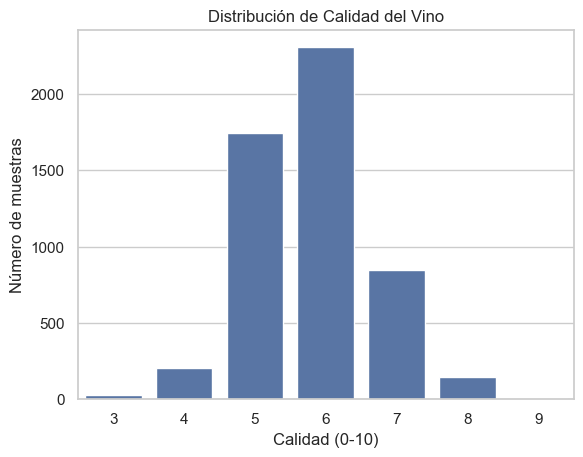

In [18]:
# 7. Distribución de la variable objetivo
sns.countplot(x='quality', data=df)
plt.title("Distribución de Calidad del Vino")
plt.xlabel("Calidad (0-10)")
plt.ylabel("Número de muestras")
plt.show()


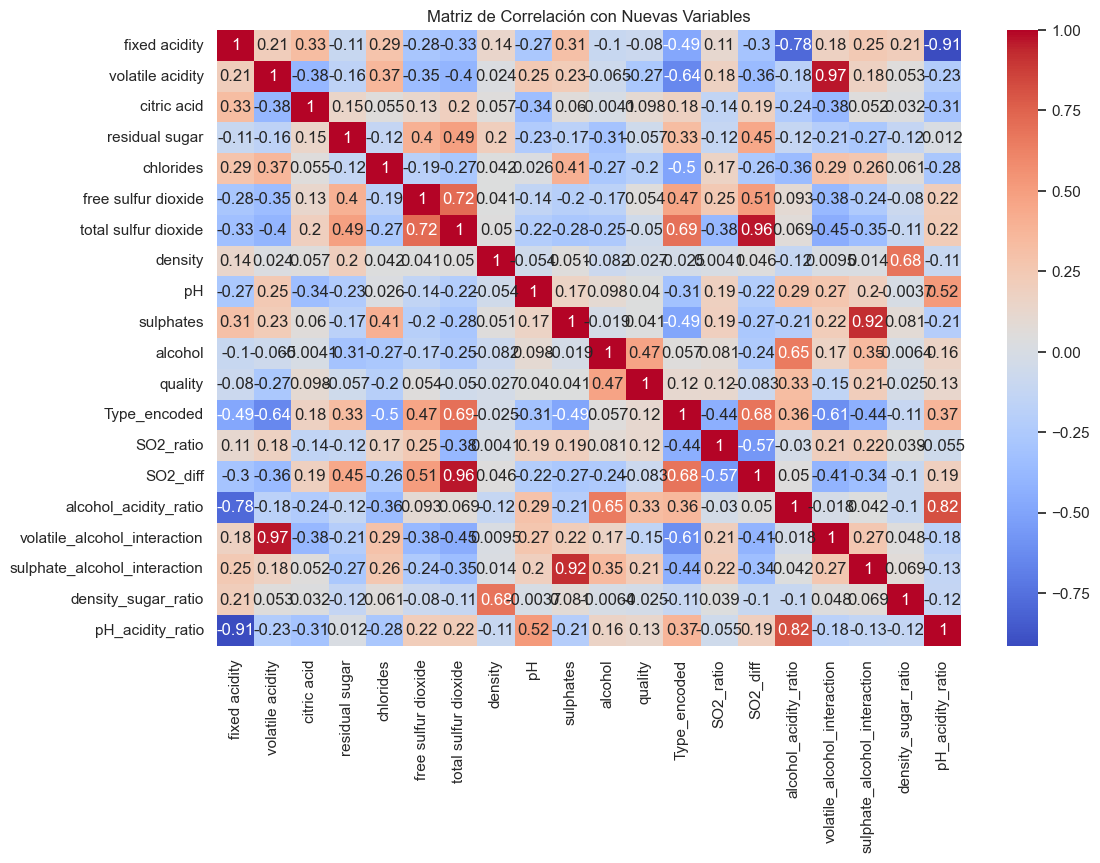

In [19]:
# 8. Matriz de correlación entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación con Nuevas Variables")
plt.show()


In [20]:
# 9. Dataset final listo para análisis o modelado
print("Shape final:", df.shape)
df.head()


Shape final: (5288, 20)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type_encoded,SO2_ratio,SO2_diff,alcohol_acidity_ratio,volatile_alcohol_interaction,sulphate_alcohol_interaction,density_sugar_ratio,pH_acidity_ratio
0,0.136698,2.115172,-2.163092,-0.699271,0.521404,-1.066985,-1.408114,-0.090553,1.778425,0.178501,-0.967042,5,-1.704543,0.288618,-1.335260,-0.740476,1.666963,-0.209466,0.039219,-0.074604
1,0.439958,3.185089,-2.163092,-0.543910,1.116948,-0.281536,-0.827576,-0.090686,-0.154015,0.979674,-0.629763,5,-1.704543,0.681738,-0.919525,-0.783952,2.816817,0.612259,-0.070294,-0.905821
2,0.439958,2.471811,-1.891584,-0.610493,0.954527,-0.842571,-1.056273,-0.090660,0.220006,0.779381,-0.629763,5,-1.704543,-0.073965,-0.985168,-0.783952,2.155257,0.439697,-0.031599,-0.749300
3,3.017668,-0.381301,1.638021,-0.699271,0.494333,-0.730364,-0.950720,-0.090527,-0.403362,0.312030,-0.629763,6,-1.704543,-0.029937,-0.897645,-1.980343,-0.490982,0.037051,0.039301,-2.106344
5,0.136698,1.877413,-2.163092,-0.721465,0.494333,-0.954778,-1.302562,-0.090553,1.778425,0.178501,-0.967042,5,-1.704543,0.300272,-1.247737,-0.740476,1.455444,-0.209466,0.061756,-0.046962


In [21]:
# Eliminar columnas originales usadas para construir nuevas features
cols_to_drop = [
    "fixed acidity",
    "volatile acidity",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "residual sugar",
    "density",
    "pH",
    "sulphates",
    "alcohol"
]

df = df.drop(columns=cols_to_drop)


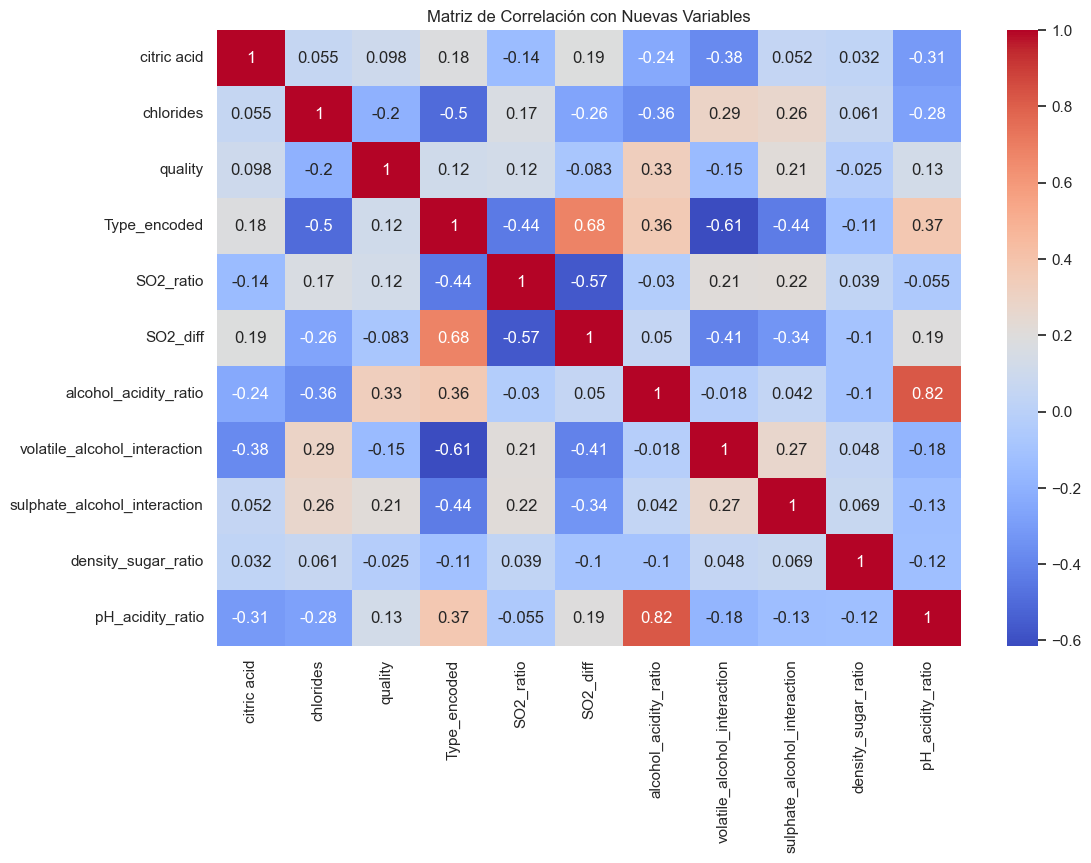

In [22]:
## Correlaciones actualizadas
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación con Nuevas Variables")
plt.show()


In [23]:
# 1. Ver columnas con valores nulos
print("🔍 Columnas con valores nulos:\n")
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]
print(nulls if not nulls.empty else "No hay columnas con valores nulos.\n")

# 2. Ver columnas categóricas (object o category)
print("\n🔤 Columnas categóricas:\n")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols if categorical_cols else "No hay columnas categóricas.\n")

# 3. Opcional: ver si hay columnas no estandarizadas (solo útil si no has escalado aún)
print("\n📏 Revisión de columnas numéricas fuera de escala (valor máximo > 10 o mínimo < -10):\n")
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
out_of_range = df[numerical_cols].apply(lambda x: x.max() > 10 or x.min() < -10)
out_of_range_cols = out_of_range[out_of_range].index.tolist()
print(out_of_range_cols if out_of_range_cols else "Todas las variables numéricas parecen estandarizadas.\n")


🔍 Columnas con valores nulos:

No hay columnas con valores nulos.


🔤 Columnas categóricas:

No hay columnas categóricas.


📏 Revisión de columnas numéricas fuera de escala (valor máximo > 10 o mínimo < -10):

['chlorides', 'density_sugar_ratio']


In [28]:
from sklearn.preprocessing import StandardScaler

# Columnas que no están estandarizadas
cols_to_rescale = ['chlorides', 'density_sugar_ratio']

# Aplicar StandardScaler solo a esas columnas
scaler = StandardScaler()
df[cols_to_rescale] = scaler.fit_transform(df[cols_to_rescale])


In [31]:
# Ver cuántos valores están fuera del rango [-3, 3] para cada columna
cols_to_check = ['chlorides', 'density_sugar_ratio']

for col in cols_to_check:
    outliers = df[(df[col] < -3) | (df[col] > 3)][col]
    print(f"🔍 {col}: {len(outliers)} valores fuera del rango [-3, 3] ({(len(outliers)/len(df))*100:.2f}%)")


🔍 chlorides: 94 valores fuera del rango [-3, 3] (1.78%)
🔍 density_sugar_ratio: 33 valores fuera del rango [-3, 3] (0.62%)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5288 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   citric acid                   5288 non-null   float64
 1   chlorides                     5288 non-null   float64
 2   quality                       5288 non-null   int64  
 3   Type_encoded                  5288 non-null   float64
 4   SO2_ratio                     5288 non-null   float64
 5   SO2_diff                      5288 non-null   float64
 6   alcohol_acidity_ratio         5288 non-null   float64
 7   volatile_alcohol_interaction  5288 non-null   float64
 8   sulphate_alcohol_interaction  5288 non-null   float64
 9   density_sugar_ratio           5288 non-null   float64
 10  pH_acidity_ratio              5288 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 495.8 KB
